In [1]:
from sklearn import tree
from dtreeviz.trees import *
from sklearn.datasets import load_boston

boston = load_boston()

X_train = boston.data
y_train = boston.target
testX = X_train[5,:]

regr = tree.DecisionTreeRegressor(max_depth=3)
regr = regr.fit(X_train, y_train)

viz = dtreeviz(regr, X_train, y_train, target_name='price',
               feature_names=boston.feature_names,
               X = testX)
viz

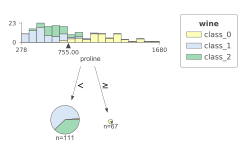

In [2]:
from sklearn.datasets import load_wine

clf = tree.DecisionTreeClassifier(max_depth=1)
wine = load_wine()

clf.fit(wine.data, wine.target)

testX = wine.data[np.random.randint(0, len(wine.data)),:]
testX=None

viz = dtreeviz(clf, wine.data, wine.target, target_name='wine',
              feature_names=wine.feature_names,
              class_names=list(wine.target_names),
              X=testX)
viz

# Single-var regression

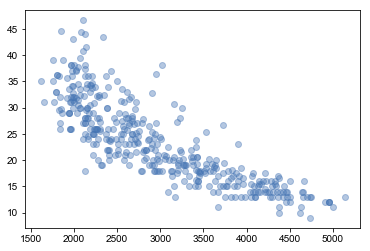

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_cars = pd.read_csv("data/cars.csv")
X = df_cars[['WGT']]
y = df_cars['MPG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

from matplotlib import rcParams

rcParams['font.family'] = 'Arial'
plt.scatter(X,y,marker='o', alpha=.4, c='#4575b4')

In [4]:
# from dtreeviz.trees import rtreeviz
# rtreeviz(X_train, y_train, max_depth=2, feature_name='Vehicle Weight', target_name='MPG')

In [5]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

0.6254578197617368


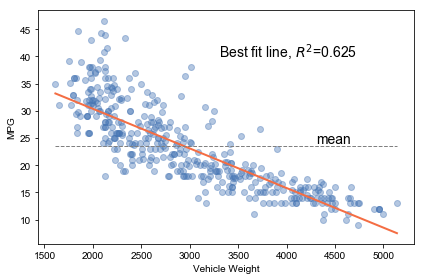

In [6]:
plt.scatter(X,y,marker='o', alpha=.4, c='#4575b4')
overall_feature_range = (np.min(X.values), np.max(X.values))
X_line = np.arange(overall_feature_range[0], overall_feature_range[1], 1).reshape(-1,1)
y_line = lm.predict(X_line)
plt.plot(X_line, y_line, color='#f46d43', lw=2)
plt.plot(overall_feature_range,[np.mean(y),np.mean(y)],'--', color='grey', linewidth=1)
plt.text(3300,40,f"Best fit line, $R^2$={lm.score(X_test,y_test):.3f}", fontsize=14)
plt.text(4300,24,"mean",fontsize=14)
plt.xlabel("Vehicle Weight")
plt.ylabel("MPG")
plt.tight_layout()
plt.savefig("/tmp/linear-model.svg", bbox_inches=0, pad_inches=0)

In [7]:
depth = 4
t = tree.DecisionTreeRegressor(max_depth=depth)
t.fit(X_train,y_train)
t.score(X_test,y_test)

0.6194944038874308

In [8]:
viz = dtreeviz(t, X, y, target_name='MPG', feature_names=['WGT'])
viz

In [9]:
y_range = (min(y), max(y)) # same y axis for all
overall_feature_range = (np.min(X.values), np.max(X.values))

shadow_tree = ShadowDecTree(t, X, y, feature_names=['WGT'])
splits = []
for node in shadow_tree.internal:
    splits.append( node.split() )
splits = sorted(splits)
bins = [overall_feature_range[0]] + splits + [overall_feature_range[1]]
bins

[1613,
 2109.0,
 2121.5,
 2124.5,
 2214.5,
 2229.0,
 2271.5,
 2350.0,
 2772.0,
 3247.5,
 3257.0,
 3431.0,
 3657.5,
 3668.0,
 3975.0,
 4361.5,
 5140]

In [10]:
wgt = X.WGT
means = []
for i in range(len(bins)-1):
    left = bins[i]
    right = bins[i+1]
    inrange = y[(wgt>=left) & (wgt<right)]
    
    means.append( np.mean(inrange) )
means

[32.99499973333333,
 39.833331666666666,
 23.0,
 31.63571425,
 26.10000014285714,
 27.810000100000003,
 26.954545909090907,
 26.155714314285717,
 21.832786918032777,
 30.0,
 19.100000136363636,
 17.9333335,
 11.0,
 16.52962966666667,
 14.805882352941175,
 12.85]

In [11]:
y.values

array([18.      , 15.      , 18.      , 16.      , 17.      , 15.      ,
       14.      , 14.      , 14.      , 15.      , 15.      , 14.      ,
       15.      , 14.      , 24.      , 22.      , 18.      , 21.      ,
       27.      , 26.      , 25.      , 24.      , 25.      , 26.      ,
       21.      , 10.      , 10.      , 11.      ,  9.      , 27.      ,
       28.      , 25.      , 19.      , 16.      , 17.      , 19.      ,
       18.      , 14.      , 14.      , 14.      , 14.      , 12.      ,
       13.      , 13.      , 18.      , 22.      , 19.      , 18.      ,
       23.      , 28.      , 30.      , 30.      , 31.      , 35.      ,
       27.      , 26.      , 24.      , 25.      , 23.      , 20.      ,
       21.      , 13.      , 14.      , 15.      , 14.      , 17.      ,
       11.      , 13.      , 12.      , 13.      , 19.      , 15.      ,
       13.      , 13.      , 14.      , 18.      , 22.      , 21.      ,
       26.      , 22.      , 28.      , 23.      , 

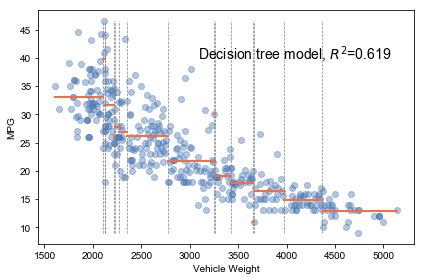

In [12]:
plt.scatter(X,y,marker='o', alpha=.4, c='#4575b4')

for split in splits:
    plt.plot([split,split],[*y_range],'--', color='grey', linewidth=.7)

prevX = overall_feature_range[0]
for i,m in enumerate(means):
    split = overall_feature_range[1]
    if i<len(splits):
        split = splits[i]        
    plt.plot([prevX,split],[m,m],'-', color='#f46d43', linewidth=2)
    prevX = split

plt.text(3090,40,f"Decision tree model, $R^2$={t.score(X_test,y_test):.3f}", fontsize=14)

plt.xlabel("Vehicle Weight")
plt.ylabel("MPG")
plt.tight_layout()
plt.savefig(f"/tmp/dectree-depth-{depth}.svg", bbox_inches=0, pad_inches=0)

# Try single-var classification

[0, 1, 2]


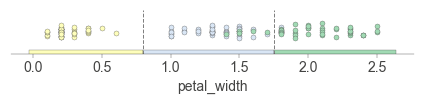

In [22]:
def ctreeviz_univar(ax, x_train, y_train, max_depth, feature_name, class_names, fontsize = 14, nbins=25, gtype='barstacked'):
    if isinstance(x_train, pd.Series):
        x_train = x_train.values
    if isinstance(y_train,pd.Series):
        y_train = y_train.values

#    ax.set_facecolor('#F9F9F9')
    ct = tree.DecisionTreeClassifier(max_depth=max_depth)
    ct.fit(x_train.reshape(-1,1), y_train)

    shadow_tree = ShadowDecTree(ct, x_train.reshape(-1,1), y_train,
                                feature_names=[feature_name], class_names=class_names)

    n_classes = shadow_tree.nclasses()
    overall_feature_range = (np.min(x_train), np.max(x_train))
    class_values = shadow_tree.unique_target_values

    color_values = color_blind_friendly_colors[n_classes]
    colors = {v:color_values[i] for i,v in enumerate(class_values)}
    X_colors = [colors[cl] for cl in class_values]

    ax.set_xlabel(f"{feature_name}", fontsize=fontsize, fontname="Arial",
                  color=GREY)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     ax.spines['left'].set_linewidth(.3)
    ax.yaxis.set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_linewidth(.3)

    r = overall_feature_range[1]-overall_feature_range[0]

    dot_w = 25

    X_hist = [x_train[y_train == cl] for cl in class_values]
    binwidth = r / nbins
    if gtype=='barstacked':
        hist, bins, barcontainers = ax.hist(X_hist,
                                            color=X_colors,
                                            align='mid',
                                            histtype='barstacked',
                                            bins=np.arange(overall_feature_range[0],overall_feature_range[1] + binwidth, binwidth),
                                            label=class_names)

        for patch in barcontainers:
            for rect in patch.patches:
                rect.set_linewidth(.5)
                rect.set_edgecolor(GREY)
        ax.set_xlim(*overall_feature_range)
        ax.set_xticks(overall_feature_range)
        ax.set_yticks([0,max([max(h) for h in hist])])
    elif gtype=='strip':
        # user should pass in short and wide fig
        mu = .5
        sigma = .06
        ax.set_ylim(mu-.4,mu+.4)
        for i,h in enumerate(X_hist):
            y_noise = np.random.normal(mu, sigma, size=len(h))
            ax.scatter(h,y_noise, alpha=1, marker='o', s=dot_w, c=colors[i], edgecolors=GREY, lw=.3)

    ax.tick_params(axis='both', which='major', width=.3, labelcolor=GREY, labelsize=fontsize)
    
    splits = []
    for node in shadow_tree.internal:
        splits.append(node.split())
    splits = sorted(splits)
    bins = [ax.get_xlim()[0]] + splits + [ax.get_xlim()[1]]

    preds = []
    for i in range(len(bins) - 1):
        left = bins[i]
        right = bins[i + 1]
        inrange = y_train[(x_train >= left) & (x_train < right)]
        values,counts = np.unique(inrange, return_counts=True)
        pred = values[np.argmax(counts)]
        height = ax.get_ylim()[1]
        rect = patches.Rectangle((left,0.08),(right-left),.08,linewidth=.3,edgecolor=GREY,facecolor=colors[pred])
        ax.add_patch(rect)
#        plt.plot([left, right], [0.1,0.1], '-', color=colors[pred], linewidth=10) # [height, height]
        preds.append(pred)
    print(preds)
    
    for split in splits:
        plt.plot([split, split], [*ax.get_ylim()], '--', color='grey', linewidth=1)


from sklearn.datasets import load_iris

iris = load_iris()
X_train = iris.data
y_train = iris.target
class_names = ["setosa", "versicolor", "virginica"]
petal_width = X_train[:,3]
petal_width

figsize = (6,1.5)
fig, ax = plt.subplots(1, 1, figsize=figsize)

max_depth = 2
ctreeviz_univar(ax, petal_width, y_train, max_depth=max_depth, feature_name = 'petal_width',
         class_names=["setosa", "versicolor", "virginica"],
         gtype='strip',
         nbins=55)
plt.tight_layout()
plt.savefig(f"/tmp/classtree-depth-{max_depth}.svg", bbox_inches=0, pad_inches=0)
plt.show()

[0, 0, 1, 1, 2, 2, 3, 3]


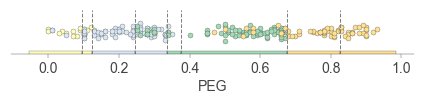

In [23]:
know = pd.read_csv("data/knowledge.csv")
class_names = ['very_low', 'Low', 'Middle', 'High']
know['UNS'] = know['UNS'].map({n: i for i, n in enumerate(class_names)})

x_train = know.PEG
y_train = know['UNS']
figsize = (6,1.5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
ctreeviz_univar(ax, x_train, y_train, max_depth=3, feature_name = 'PEG', class_names=class_names, nbins=40, gtype='strip')
plt.tight_layout()
plt.savefig(f"/tmp/classtree-depth-{max_depth}.svg", bbox_inches=0, pad_inches=0)
plt.show()